# Project 2

You want to invest DKK 100.000 in a portfolio of mutual funds and ETFs using the Markowitz model.

## Asset univserse

Having learnt about the Investment Funnel tool in this course, you decide to pick your portfolios from the following asset universe:

**You may assume that the risk free rate of return is 0.00 (0%).** Download weekly adjusted returns from the Investment Funnel from January 11, 2012 until August 18, 2021 for the 17 given assets.

In [35]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from datetime import datetime

In [33]:
assets = pd.read_csv('./ProjectData.csv', index_col="Date")

In [29]:
assets

,DK0060079614,DK0010264456,DK0060158590,DK0016272602,DK0016272446,DK0010303296,DK0016262728,DK0060037455,DK0010246479,DK0061150984,IE00B1XNHC34,DE000A0H08R2,DE000A0H08H3,IE00B5WHFQ43,DE000A0H08S0,IE00B0M63391,IE00B2NPL135
Date,,,,,,,,,,,,,,,,,
2012-01-11 00:00:00+00:00,-3.413552e-04,0.119967,0.000000,0.032436,0.013744,0.068514,0.005917,0.008606,-0.000308,0.000000,0.066046,-0.006328,-0.008395,0.017068,0.013658,0.017455,0.014290
2012-01-18 00:00:00+00:00,2.731774e-02,0.023630,0.000000,0.048908,-0.009472,0.031990,0.009519,-0.010395,-0.007467,0.000000,0.013430,-0.015054,-0.003211,0.019694,0.004268,0.042003,0.012232
2012-01-25 00:00:00+00:00,6.232342e-02,0.030809,0.000000,-0.010940,-0.000730,0.030998,0.011319,-0.010565,-0.027729,0.000000,-0.030453,-0.013913,0.000581,-0.007353,0.010851,0.024022,-0.012298
2012-02-01 00:00:00+00:00,-2.080726e-02,0.011589,0.001872,0.027277,-0.008455,0.026424,0.015219,0.003498,0.020847,0.002111,0.008784,0.006244,0.008224,0.015901,0.023434,-0.005031,0.041806
2012-02-08 00:00:00+00:00,3.882409e-02,0.034456,0.000000,0.014844,0.004844,0.018517,0.011017,-0.006727,-0.019669,0.000000,0.048572,0.004574,0.002938,0.022475,0.009696,0.011882,0.055619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21 00:00:00+00:00,0.000000e+00,-0.005933,0.001823,-0.007686,0.003066,-0.015878,-0.006619,-0.004069,-0.016322,0.001098,0.002942,-0.149369,-0.093576,0.003192,-0.092242,-0.020690,-0.020646
2021-07-28 00:00:00+00:00,6.724823e-08,0.000000,0.002224,0.018729,-0.004430,0.001034,0.001991,-0.006326,0.012492,0.001296,-0.003098,0.154184,0.102261,0.038146,0.150363,0.005162,-0.006029
2021-08-04 00:00:00+00:00,-6.724823e-08,0.034247,0.001311,0.029251,0.004943,0.030400,0.004925,0.002851,-0.018819,0.000498,0.017194,0.009536,0.001865,-0.005349,-0.040421,0.021622,0.004623


In [30]:
assets.index

Index(['2012-01-11 00:00:00+00:00', '2012-01-18 00:00:00+00:00',
       '2012-01-25 00:00:00+00:00', '2012-02-01 00:00:00+00:00',
       '2012-02-08 00:00:00+00:00', '2012-02-15 00:00:00+00:00',
       '2012-02-22 00:00:00+00:00', '2012-02-29 00:00:00+00:00',
       '2012-03-07 00:00:00+00:00', '2012-03-14 00:00:00+00:00',
       ...
       '2021-06-16 00:00:00+00:00', '2021-06-23 00:00:00+00:00',
       '2021-06-30 00:00:00+00:00', '2021-07-07 00:00:00+00:00',
       '2021-07-14 00:00:00+00:00', '2021-07-21 00:00:00+00:00',
       '2021-07-28 00:00:00+00:00', '2021-08-04 00:00:00+00:00',
       '2021-08-11 00:00:00+00:00', '2021-08-18 00:00:00+00:00'],
      dtype='object', name='Date', length=502)

## Question 1

#### 1.1- Explain how these 17 assets were chosen in the Investment Funnel to the TA when youpresent your results. In other words explain how the Minimum Spanning Tree method isused to choose these assets. (Hint: Kourosh has given a lecture on this topic Wednesday13th of October).

## Question 2

#### 2.1 -  Assuming your 100.000 DKK in any of these 17 assets at the beginning of the period, draw 17 graphs in the same frame showing the development of your investment during the entire period.

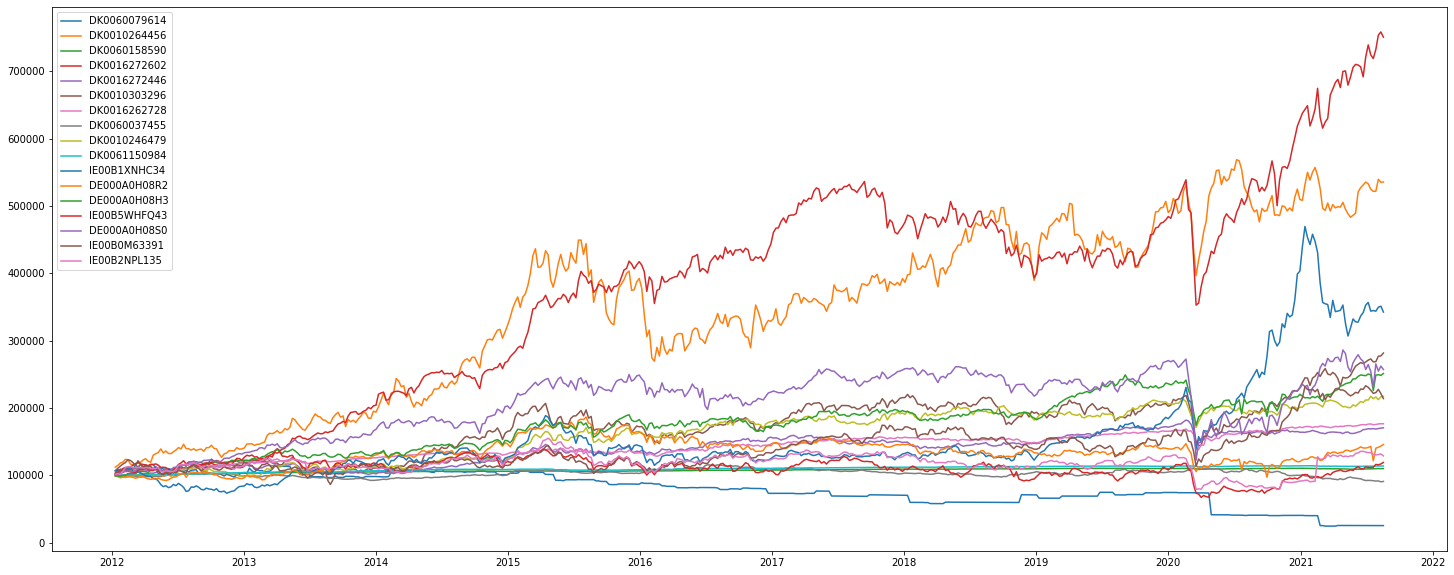

In [88]:
dates = [datetime.strptime(date[:-6], '%Y-%m-%d %H:%M:%S') for date in assets.index]



plt.figure(figsize=(25,10))


# direkte på rate of return, ser grusomt ut, tror ikke det er riktig
"""for asset in assets.columns:
    plt.plot(dates, assets[asset], label=asset)"""


#regne på "nåverdi" av de 100 000 kr
for asset in assets.columns:
    values = [100000+(100000*assets[asset][0])] #begynne på 0-indeks i asseten
    
    for i in range(len(dates)-1):
        values.append(values[i]+(assets[asset][i+1]*values[i])) #går fra indeks 1 til 502 i asset
    plt.plot(dates, values, label=asset)
    

plt.legend()
plt.show()

#### 2.2 - What are the average historical returns (in annualized terms), standard deviation ofreturns (also in annualized terms) and correlation between returns?

#### 2.3 - What does the distribution of returns look like? What are the range, skewness, kurtosis and autocorrelation of the returns? What is the Sharpe Ratio of each asset?

## Question 3

Based on the Markowitz portfolio theory, derive and illustrate the optimal portfolio choices. Identify the following portfolios **in terms of weights, return and risk**:

#### 3.1 - The maximum expected return portfolio.

#### 3.2 - The global minimum variance portfolio.

####  3.3 - Draw the efficient frontier using 8 different expected returns in between the returns youfound in questions 3.1 and 3.2. There should be equal distance between each pair of returnsin the efficient frontier. Find the portfolio weights for each of the 8 optimal portfolios as well.

#### 3.4 - What is the equal weight portfolio? Use the return of this portfolio as the target return inthe following question. Draw the risk and return of the equal weight portfolio in the samegraph together with the efficient frontier.

#### 3.5 - Now find the exact optimal portfolio that has the same return as the return in the equalweight portfolio. Add this point on the efficient frontier and calculate the difference ofexpected return between this portfolio and the queal weight portfolio.

#### 3.6 - Find the tangent portfolio, and draw the capital market line from the risk free point to the efficient frontier.